# 1. Lane Detection

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# path = './강의 파일/5 실습이미지데이터/'

In [88]:
src = cv2.imread(path + 'lane.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0) # 블러
canny = cv2.Canny(blur, 50, 150) # 에지 검출

cv2.imshow('src', src)
cv2.imshow('gray', gray)
cv2.imshow('blur', blur)
cv2.imshow('canny', canny)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [87]:
cap = cv2.VideoCapture(path + 'lane.mp4')
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), 
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

print('frame_size =', frame_size)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    retval, frame = cap.read()
    if not retval:
        break
    
    cv2.imshow('lane.mp4', frame)
    
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
    
if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

frame_size = (1280, 720)
1280.0
720.0


-1

In [29]:
# 전체 에지 영역 비디오 실행
cap = cv2.VideoCapture(path + 'lane.mp4')
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), 
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

print('frame_size =', frame_size)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    retval, frame = cap.read()
    if not retval:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)

    cv2.imshow('lane.mp4', canny)
    
    key = cv2.waitKey(25)
    if key == 27:
        break
    
if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

frame_size = (1280, 720)
1280.0
720.0


-1

In [89]:
triangle = np.array([[(200, frame_size[1]), (1100, frame_size[1]), (550, 250)]])
print(triangle[0])

mask = np.zeros_like(canny) 
cv2.fillPoly(mask, triangle, 255) 
masked_image = cv2.bitwise_and(canny, mask)

cv2.imshow('canny', canny)
cv2.imshow('mask', mask)
cv2.imshow('masked_image', masked_image)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

[[ 200  720]
 [1100  720]
 [ 550  250]]


-1

In [90]:
# 에지 영역만 남긴 비디오 실행
cap = cv2.VideoCapture(path + 'lane.mp4')
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), 
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

print('frame_size =', frame_size)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    retval, frame = cap.read()
    if not retval:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    
    triangle = np.array([[(200, frame_size[1]), (1100, frame_size[1]), (550, 250)]])
    mask = np.zeros_like(canny)
    cv2.fillPoly(mask, triangle, 255) 
    masked_image = cv2.bitwise_and(canny, mask)

    cv2.imshow('masked_image', masked_image)
    
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
    
if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

frame_size = (1280, 720)
1280.0
720.0


-1

In [93]:
# 에지 선의 시작점과 끝점 반환
lines = cv2.HoughLinesP(masked_image, rho=2, theta = np.pi/180.0, 
                        threshold=100) 

x1, y1, x2, y2 = lines[0][0]
cv2.line(masked_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
cv2.imshow('lane_image', masked_image)
cv2.imshow('canny', canny)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [3]:
# 허프라인스만으로 그레이컬러에서 실행
cap = cv2.VideoCapture('./image/lane.mp4')
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), 
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

print('frame_size =', frame_size)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    retval, frame = cap.read()
    if not retval:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    lines = cv2.HoughLinesP(gray, rho=2, theta = np.pi/180.0, threshold=100) 
    
    for no, line in enumerate(lines):
        if no == 10:
            break
        x1, y1, x2, y2 = line[0]
        cv2.line (gray, (x1, y1), (x2, y2), (0, 0, 255), 2)

    cv2.imshow('gray', gray)
    
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
    
if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

frame_size = (1280, 720)
1280.0
720.0


27

In [5]:
def LaneDetection(src, roi):
    # canny edge detection
    img = src.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    
    # set ROI
    height = canny.shape[0]
    mask = np.zeros_like(canny)
    cv2.fillPoly(mask, roi, 255)
    masked_image = cv2.bitwise_and(canny, mask)
    
    
    # line detection
    lines = cv2.HoughLinesP(masked_image, rho=1, theta=np.pi/180.0, threshold=100)
    
    # draw line
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0,0,255), 2)
        
    return img

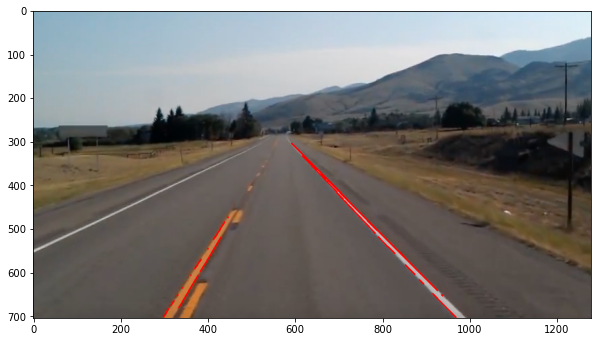

In [56]:
triangle = np.array([[(200, frame_size[1]), (1100, frame_size[1]), (550, 250)]])
image = src.copy()
line_image = LaneDetection(image, triangle)
imageRGB = cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(imageRGB)
plt.show()

In [6]:
import cv2
import numpy as np

path = './image/'

cap = cv2.VideoCapture(path + 'lane.mp4')
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)
triangle = np.array([[(200, frame_size[1]), (1100, frame_size[1]), (550, 250)]])

while True:
    retval, frame = cap.read()
    if not retval:
        break
    
    # lane detection
    lane = frame.copy()
    line_image = LaneDetection(lane, triangle)
    
    cv2.imshow('lane.mp4', frame)
    cv2.imshow('lane', line_image)
    
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
    
if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()
cv2.waitKey(1)

frame_size = (1280, 720)


-1

In [64]:
def LaneDetection(src, roi, HL=True):
    # canny edge detection
    img = src.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    
    # set ROI
    height = canny.shape[0]
    mask = np.zeros_like(canny)
    cv2.fillPoly(mask, roi, 255)
    masked_image = cv2.bitwise_and(canny, mask)
    
    # line detection
    if HL:
        lines = cv2.HoughLinesP(masked_image, rho=1, theta=np.pi/180.0, threshold=100)
    
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), (0,0,255), 2)
        
    return img

In [65]:
import cv2
import numpy as np

path = './강의 파일/5 실습이미지데이터/'

cap = cv2.VideoCapture(path + 'lane.mp4')
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)
triangle = np.array([[(200, frame_size[1]), (1100, frame_size[1]), (550, 250)]])

while True:
    retval, frame = cap.read()
    if not retval:
        break
    
    # lane detection
    lane = frame.copy()
    line_image = LaneDetection(lane, triangle, False)
    
    cv2.imshow('lane.mp4', frame)
    cv2.imshow('lane', line_image)
    
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
    
if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()
cv2.waitKey(1)

frame_size = (1280, 720)


-1